HTML(value="<h2 style='color: red; margin: 0; padding: 0;'>6TiSCH Cell Allocation Simulator</h2><p style='colo…

HTML(value='')

Topology is created as follows:
Root node is created


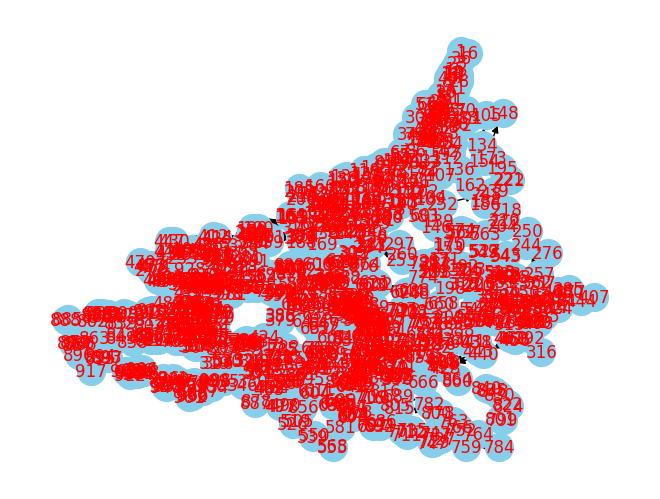

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Average of Utilization:  55.7
Total 6P Signals: 74013 


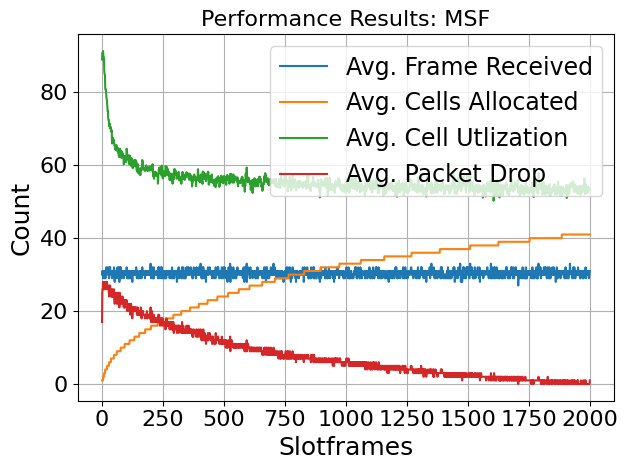

Average of Utilization:  99.886
Total 6P Signals: 0 


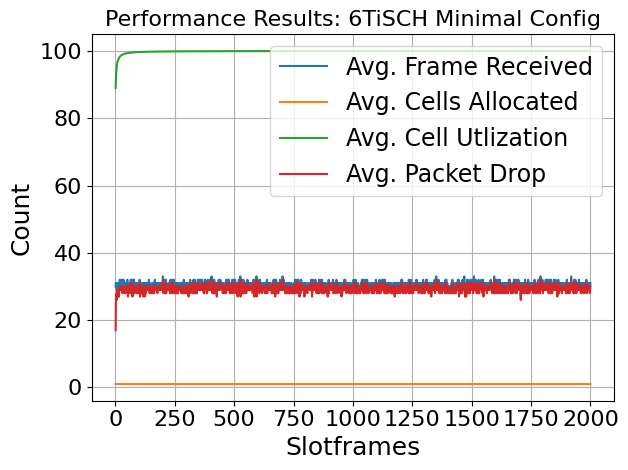

Average of Utilization:  44.127
Total 6P Signals: 0 


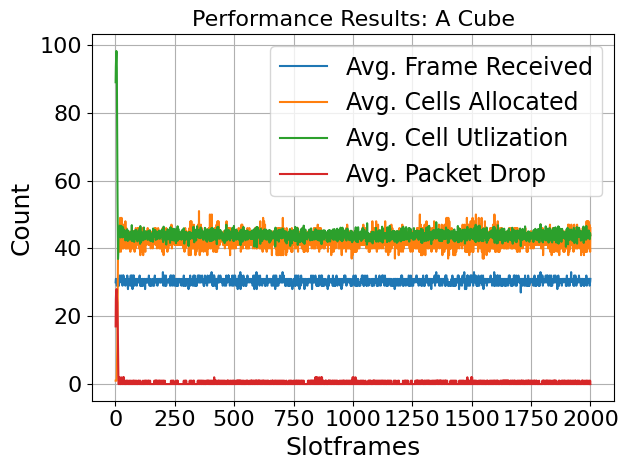

Average of Utilization:  85.717
Total 6P Signals: 181393 


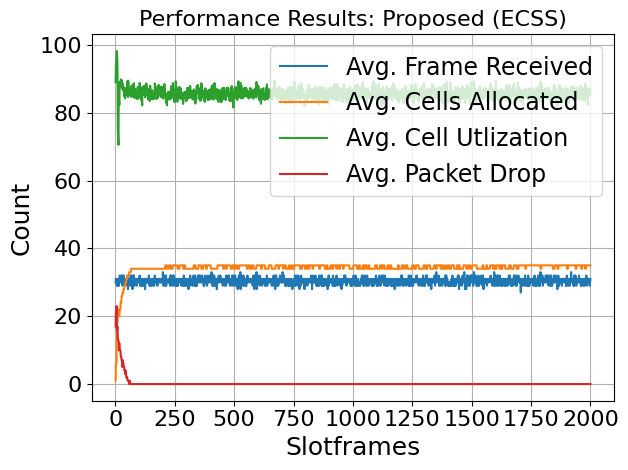

In [146]:
import ipywidgets as widgets
from IPython.display import display, HTML
from IPython.display import clear_output


def main():

    try:
      create_interface()
    except NameError as e:
      warning_label = widgets.HTML(
        value="<h2 style='color: red; margin: 0; padding: 0;'>Warning !!! Click on \"Runtime -> Run All\" on Google Colab  </h2>")
      display(warning_label)
    except Exception as e:
      warning_label = widgets.HTML(
        value="<h2 style='color: red; margin: 0; padding: 0;'>Warning !!! Click on \"Runtime -> Run All\" on Google Colab First </h2>")
      display(warning_label)


if __name__ == "__main__":
    main()


In [147]:




































# Hello

In [148]:
def create_interface():
# Create interactive widgets with default values and smaller widths
    #warning_label.description = "Regenerate Frame"

    global Running_scheme

    node_widget = widgets.IntText(value=30, style={'description_width': 'initial'}, layout={'width': '80px'})
    node_max_degree_widget = widgets.IntText(value=5, style={'description_width': 'initial'}, layout={'width': '80px'})
    max_topology_level_widget = widgets.IntText(value=4, style={'description_width': 'initial'}, layout={'width': '80px'})
    slotframe_widget = widgets.IntText(value=1000, style={'description_width': 'initial'}, layout={'width': '80px'})

    pkt_min = widgets.IntText(value=0, style={'description_width': 'initial'}, layout={'width': '80px'})
    pkt_max = widgets.IntText(value=3, style={'description_width': 'initial'}, layout={'width': '80px'})



    topology_button = widgets.Button(description="Create Topology")
    frame_button = widgets.Button(description="Generate Frames", disabled=True)
    simulation_button = widgets.Button(description="Start Simulation", disabled=True)
    save_result_button = widgets.Button(description="Save Results", disabled=True)
    clear_button = widgets.Button(description="Clear Output", disabled=True)


    # Add labels
    simulator_label = widgets.HTML(
        value="<h2 style='color: red; margin: 0; padding: 0;'>6TiSCH Cell Allocation Simulator</h2>"
              "<p style='color: blue; margin: 0; padding: 0;'>Developed by Alakesh</p>",
        layout={'margin': '0 0 5px 0'}
    )

    # Scheduling Scheme Selection
    scheduling_scheme_label = widgets.HTML(value="<h3 style='color: blue;'>Select One Scheduling Scheme:</h3>")
    scheduling_scheme_dropdown = widgets.Dropdown(
        options=['MSF', '6TiSCH Minimal Config' ,'A Cube', 'Proposed (ECSS)'],
        value='MSF',
        description='Scheme:',
        style={'description_width': 'initial'},
        layout={'width': '200px'}
    )

    # Create a container for widgets with borders and horizontal lines
    widget_container = widgets.VBox([
        widgets.HBox([widgets.Label("Node:"), node_widget]),
        widgets.HBox([widgets.Label("Node Max Degree:"), node_max_degree_widget]),
        widgets.HBox([widgets.Label("Max Topology Level:"), max_topology_level_widget]),
        widgets.HBox([widgets.Label("Slotframes:"), slotframe_widget]),
        widgets.HBox([widgets.Label("Min Pkt/Sloframe:"), pkt_min]),
        widgets.HBox([widgets.Label("Max Pkt/Sloframe:"), pkt_max]),
        widgets.HTML("<hr>"),  # Horizontal line
        scheduling_scheme_label,
        scheduling_scheme_dropdown,
        widgets.HTML("<hr>"),  # Horizontal line
        widgets.HBox([topology_button, frame_button, simulation_button, save_result_button, clear_button]),
        widgets.HTML("<hr>"),  # Horizontal line
    ])

    # Create a container for the results
    result_container = widgets.HTML()



    # Define the function to run when the button is clicked
    def Create_Topology(b):
        #clear_output(wait=True)
        global topology_created
        node = node_widget.value
        node_max_degree = node_max_degree_widget.value
        Max_Topology_Level = max_topology_level_widget.value
        print("Topology is created as follows:")
        build_topology(node, node_max_degree, Max_Topology_Level)
        draw_topology()

        topology_created = True
        frame_button.disabled = False
        clear_button.disabled = False
        topology_button.description = "Rebuild Topology"

    def Start_Simulation(b):
        # Assuming Node_Reset, simulation, and result_visualization are functions you've defined
        if scheduling_scheme_dropdown.value == 'MSF':
          global MSF, A_cube, My_Propose, utilization_threshold_MAX, utilization_threshold_MIN, Running_scheme
          Running_scheme = 'MSF'
          MSF = True
          A_cube = False
          My_Propose = False
          utilization_threshold_MAX = 75
          utilization_threshold_MIN = 25

        Node_Reset()
        no_of_pkts = slotframe_widget.value
        for i in range(0, no_of_pkts):
            k = simulation(1, i)  # 1 is id for root
            # print(f"Total Packets {k}")
        #print("Simulation Done !!!")
        result_container.value = "<h3>Simulation Result:</h3>"  # Update the result container
        result_visualization()

        save_result_button.disabled = False


    def Generate_Frame(b):
        # Assuming generate_frames is a function you've defined

        node = node_widget.value
        no_of_pkts = slotframe_widget.value  # total packets for simulation
        min_pkt_rate = pkt_min.value
        max_pkt_rate = pkt_max.value

        generate_frames(node, no_of_pkts, min_pkt_rate, max_pkt_rate)
        simulation_button.disabled = False
        frame_button.description = "Regenerate Frame"

    # Define the function to run when scheduling scheme is selected
    def on_scheme_change(change):
        global MSF, A_cube, My_Propose, utilization_threshold_MAX, utilization_threshold_MIN, Running_scheme
        save_result_button.disabled = True

        if scheduling_scheme_dropdown.value == 'MSF':
            MSF = True
            A_cube = False
            My_Propose = False
            utilization_threshold_MAX = 75
            utilization_threshold_MIN = 25
            Running_scheme = 'MSF'

        elif scheduling_scheme_dropdown.value == '6TiSCH Minimal Config':
            MSF = False
            A_cube = False
            My_Propose = False
            Running_scheme = '6TiSCH Minimal Config'

        elif scheduling_scheme_dropdown.value == 'A Cube':
            MSF = False
            A_cube = True
            My_Propose = False
            Running_scheme = 'A Cube'
        elif scheduling_scheme_dropdown.value == 'Proposed (ECSS)':
            MSF = False
            A_cube = False
            My_Propose = True
            utilization_threshold_MAX = 90
            utilization_threshold_MIN = 75
            Running_scheme = 'Proposed (ECSS)'


    def Clear_Output(b):
      clear_output(wait=True)
      create_interface()




    def Save_Result(b):
      global Running_scheme
      files.download(f'{Running_scheme}.pdf')

    # Attach the function to the dropdown's change event
    scheduling_scheme_dropdown.observe(on_scheme_change, names='value')

    # Attach the function to the button's click event
    topology_button.on_click(Create_Topology)
    frame_button.on_click(Generate_Frame)
    simulation_button.on_click(Start_Simulation)

    save_result_button.on_click(Save_Result)
    clear_button.on_click(Clear_Output)


    # Display the widgets in an organized layout
    display(simulator_label)
    display(widget_container)
    display(result_container)


In [149]:

import random
import math
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files


# Initialize state variables
topology_created = False

# Global Variables
utilization_threshold_MAX = 75
utilization_threshold_MIN = 25

Running_scheme = 'MSF'
MSF  = True
A_cube = False
My_Propose = False
Nodes = {}
frame = {}  # dictionary contains the frame

# Import the content of 'Simulator.ipynb' using %run


class Node:
  def __init__(self,id,level, root, isRoot = False):
    self.id = id
    self.level = level
    self.root  = root #parent
    self.isRoot = isRoot
    self.isLeaf = True
    self.child = {}



  def add_child (self, child_id):
    self.child[child_id.id] = {
            'current_rx_cells': 1,
            'num_cells_elapsed': 0,
            'BUFFER_SIZE': 64,
            'MAX_NUM_CELLS': 1,
            'num_cells_used': 0,
            'sender_buffer': 0,
            'utilization_window': [],
            'buffer_window': [0],
            'buffer_flag': 0,
            'flag': 0,
            'sixP_signal': 0,
            'packet_dropped': [],
            'current_iteration': 1,
            'avg_utilization': 0,
            'buffer_window_count': 0,
            'plot_assign_rx_cells': [],
            'plot_req_rx_cells' : [],
            'plot_utilization': [],
            'rate' : 0.5 # For A_cube
    }
    #print(f"A child is added {self.child[child_id]}")

  def print_child(self):
    for key, value in self.child.items():
       print(f"{key}: {value}")

  def __str__(self):
    return str(f"{{'Node ID': {self.id}, 'Level': {self.level}, 'Root': {self.root}}},")


  def update_cell_counters(self, sender_id, num_frames): # num_frame is the incoming number of packets

        sender = self.child[sender_id]
        #print(f"Printing Sender value {sender}")
        #print(f"Update_Cell_Counter: I am {self.id }, Get {num_frames} packets from child node {sender_id}")

        sender['num_cells_elapsed'] += sender['current_rx_cells']

        if num_frames >= sender['current_rx_cells']:
            sender['num_cells_used'] += sender['current_rx_cells']
            sender['sender_buffer'] += num_frames - sender['current_rx_cells'] #sender buffer



            if sender['sender_buffer'] > sender['BUFFER_SIZE']:
                #print(f"Warning! Buffer overflow {sender['sender_buffer'] - sender['BUFFER_SIZE']} frames dropped !!")
                sender['packet_dropped'].append(sender['sender_buffer'] - sender['BUFFER_SIZE'])
                sender['sender_buffer'] = sender['BUFFER_SIZE']

            else:    # there is no packet drop
                 sender['packet_dropped'].append(0)


        else:
            can_accommodate = sender['current_rx_cells'] - num_frames
            sender['packet_dropped'].append(0) # there is no packet drop

            if sender['sender_buffer'] > 0:
                sender['num_cells_used'] += (num_frames + min(can_accommodate, sender['sender_buffer']))
                sender['sender_buffer'] -= min(can_accommodate, sender['sender_buffer']) # buffer counts gets updated
            else:
                sender['num_cells_used'] += num_frames

        #buffer.append(sender['sender_buffer']) I think no use of it

        sender['plot_assign_rx_cells'].append(sender['current_rx_cells'])
        sender['plot_req_rx_cells'].append(num_frames)

        #sender['current_iteration'] += 1


        #################### My Propose Scheme #######################
        #I dont find any logic here
        if My_Propose == True:
          sender['buffer_window'].append(sender['sender_buffer'])

          if len(sender['buffer_window']) >= 10 or sender['num_cells_elapsed'] >= sender['MAX_NUM_CELLS']: # what does it mean?
              buffer_mean = np.mean(sender['buffer_window'])
              if (buffer_mean / (sender['sender_buffer']+1)) * 100 > 50 and sender['sender_buffer'] > 0: # there is change in the buffer
                  if (buffer_mean - sender['sender_buffer']) < 0:
                      sender['buffer_flag'] = 10 # buffer is increasing
                  else:
                      sender['buffer_flag'] = 20 # shrinking
              else:
                  sender['buffer_flag'] = 0

              sender['buffer_window_count'] += 1

              k = sender['buffer_window_count']
              sender['buffer_window'][k - 1] = sender['sender_buffer']

              if sender['buffer_window_count'] >= 10: #working as round robind..taking last 10 buffer count
                  sender['buffer_window_count'] = 0

          #elif len(sender['buffer_window']) <= 10:


          #################### End of My Propose Scheme #######################


        sender['utilization'] = min((sender['num_cells_used'] / sender['num_cells_elapsed']) * 100, 100)
        #sender['utilization_window'].append(sender['utilization'])
        sender['plot_utilization'].append(sender['utilization'])

        ####################### Taking the decision of adding slots or not ##################
        if sender['num_cells_elapsed'] >= sender['MAX_NUM_CELLS']:
            # sender['avg_utilization'] = np.mean(sender['utilization_window'])
            # sender['utilization_window'] = [] #why resetting?
            self.adjust_cells(sender_id)

  def adjust_cells(self, sender_id):
        sender = self.child[sender_id]

        # #################### My Propose Scheme #######################
        if My_Propose == True:
            if sender['utilization'] > utilization_threshold_MAX and (
                    sender['buffer_flag'] == 10 or sender['sender_buffer'] > sender['BUFFER_SIZE'] / 4):

                num_cells_to_add = math.ceil(sender['sender_buffer'] / 2)
                #print(f"Adding {num_cells_to_add} slots; Sender has {sender['sender_buffer']} pkts in its buffer")
                self.add_cells(sender_id,num_cells_to_add)
                sender['sixP_signal'] += 1
                sender['flag'] = sender['current_iteration']


            if sender['utilization'] < utilization_threshold_MIN:
                   num_cells_to_delete = math.ceil(sender['current_rx_cells'] * (1 - (sender['num_cells_used'] / sender['num_cells_elapsed'])))
                   #print(f"Deleting {num_cells_to_delete} slots; Sender has {sender['sender_buffer']} pkts in its buffer")
                   self.delete_cells(sender_id, num_cells_to_delete)
                   sender['sixP_signal'] += 1

            sender['MAX_NUM_CELLS'] = 4 * sender['current_rx_cells']
            sender['num_cells_elapsed'] = 0
            sender['num_cells_used'] = 0


        #################### MSF #######################
        if MSF == True:

              if sender['utilization'] > utilization_threshold_MAX:
                self.add_cells(sender_id,1)
                sender['sixP_signal'] += 1
              elif sender['utilization'] < utilization_threshold_MIN:
                self.delete_cells(sender_id,1)
                sender['sixP_signal'] += 1

              sender['MAX_NUM_CELLS'] = 4 * sender['current_rx_cells'] # need to check in RFC how many cells are allocated
              sender['num_cells_elapsed'] = 0
              sender['num_cells_used'] = 0

        #################### A_cube #######################

        #error in A cube: Need to study the paper
        if A_cube == True:


          lamda = .1

          for _ in range(0, sender['current_rx_cells']): # calculating for each packet
              sender['rate'] = ((1-lamda) * sender['rate']) + lamda


          if (sender['current_rx_cells']>sender['num_cells_used']): # calculating when slots are assigned but not used
              for _ in range(0, sender['current_rx_cells']-sender['num_cells_used']):
                sender['rate'] = (1-lamda) * sender['rate']

          if sender['rate'] >1:
            sender['rate'] = 1



          if sender['rate'] > 0.65:

                cells_to_add = sender['current_rx_cells'] #doubling the cells
                self.add_cells(sender_id, cells_to_add)
                #sender['sixP_signal'] += 1
          elif sender['rate'] < 0.25:
                cells_to_delete = int(sender['current_rx_cells']/2) #deleting half of the cells
                self.delete_cells(sender_id, cells_to_delete)
                #sender['sixP_signal'] += 1

          sender['num_cells_elapsed'] = 0
          sender['num_cells_used'] = 0


  def add_cells(self, sender_id, cell_to_add):
        sender = self.child[sender_id]
        sender['current_rx_cells'] += cell_to_add



  def delete_cells(self, sender_id, cell_to_delete):
        sender = self.child[sender_id]
        sender['current_rx_cells'] = max(sender['current_rx_cells'] - cell_to_delete, 1)


# End of Node class





def get_random_parent(dict, level):
    keys = [] #[key for key in dict.keys() if key != exclude_key]
    for key, value in Nodes.items():
      if Nodes[key].level == level-1:
        keys.append(Nodes[key].id)

    if keys:
        return random.choice(keys)
    else:
        return None

def build_topology (node, node_max_degree, Max_Topology_Level):
  level = 0
  id = 1
  root = Node (id,level,0,isRoot = True)
  root.isLeaf = False # root is not a leaf node
  print("Root node is created")
  #print (root)
  Nodes[root.id]= root
  node_left = node-1

  while node_left > 0 and level < Max_Topology_Level:
    level += 1

    if level == 1 and node_left > 0: #node 1 can be parent, no choice
      k = min(random.randint(1, node_left),node_max_degree) # Each level can contain maximum node_max_degree nodes
      node_left -= k

      for _ in range (0,k):
        id += 1
        new_node = Node(id, level, root.id)
        Nodes[id] = new_node
        root.add_child(new_node)


    elif node_left > 0:
      k = min(random.randint(1, node_left),node_max_degree)
      node_left -= k

      for _ in range (0,k):
        id += 1
        get_parent_id = get_random_parent(Nodes, level)
        new_node = Node(id, level, get_parent_id)
        Nodes[get_parent_id].isLeaf = False # parent is no more a leaf node
        Nodes[id] = new_node
        Nodes[get_parent_id].add_child(new_node)


    if level == Max_Topology_Level and node_left > 0:    # add all the remaining nodes in the last level
      k = node_left
      node_left = 0

      for _ in range (0,k):
        id += 1
        get_parent_id = get_random_parent(Nodes, level)
        new_node = Node(id, level, get_parent_id)
        Nodes[get_parent_id].isLeaf = False # parent is no more a leaf node
        Nodes[id] = new_node
        Nodes[get_parent_id].add_child(new_node)


def draw_topology():

  G = nx.DiGraph()

  for key, value in Nodes.items():
      #G.add_node(key, **value.__dict__)
      for child_id, child_value in Nodes[key].child.items():
          G.add_edge(child_id,key)

  pos = nx.spring_layout(G)
  nx.draw(G, pos, with_labels=True, node_size=400, node_color="skyblue", font_size=12, font_color="red", arrowsize=10)
  plt.show()


def generate_frames(node, no_of_pkts, min_pkt_rate, max_pkt_rate):
  for i in range(0, node):
      key = i+1
      if i ==0:
        values = [random.randint(0, 0) for _ in range(no_of_pkts)]
      else:
        values = [random.randint(min_pkt_rate, max_pkt_rate) for _ in range(no_of_pkts)]
        #print(values)
      frame[key] = values

  print(frame)

def simulation(node_id, iteration):
  my_pkt = frame[node_id][iteration]
  if Nodes[node_id].isLeaf:
    #print(f"I am leaf with ID: {node_id}")
    return my_pkt

  else:
    my_child_node = []
    total_pkt = 0
    for key, value in Nodes[node_id].child.items():
      my_child_node.append(key) #ids of the child nodes

    total_child = len(my_child_node)
    #print(f"Simulation: I am Node {node_id} with {total_child} total childs : {my_child_node}")


    #################### A node should process all the packets before sending to its parent ############################
    for i in range(0, total_child):

        pkt_receive = simulation(my_child_node[i],iteration) #recursive call for all the child nodes
        #print(f"Simulation: Node {node_id} receives {pkt_receive} packets from {my_child_node[i]}")

        ############## Packet Processing #################
        Nodes[node_id].update_cell_counters(my_child_node[i], pkt_receive)

        total_pkt += pkt_receive
    return total_pkt + my_pkt


def Node_Reset():
    for key, value in Nodes.items():
      for child_key, child_values in Nodes[key].child.items():
        #print(Nodes[key].child[child_key])
        Nodes[key].child[child_key] = {
            'current_rx_cells': 1,
            'num_cells_elapsed': 0,
            'BUFFER_SIZE': 64,
            'MAX_NUM_CELLS': 1,
            'num_cells_used': 0,
            'sender_buffer': 0,
            'utilization_window': [],
            'buffer_window': [],
            'buffer_flag': 0,
            'flag': 0,
            'sixP_signal': 0,
            'packet_dropped': [],
            'current_iteration': 0,
            'avg_utilization': 0,
            'buffer_window_count': 0,
            'plot_assign_rx_cells': [],
            'plot_req_rx_cells' : [],
            'plot_utilization': [],
            'rate' : 0.5 # For A_cube
            }


def result_visualization():
  Req_Rx_Cells = {}
  Assign_Rx_Cells = {}
  Plot_Utilization = {}
  Plot_pkt_drop = {}

  global Running_scheme
  Total_SixP_Signal = 0
  #global  Total_SixP_Signal
  for key, values in Nodes.items():
    #print(f"Parent {Nodes[key].id} child details")
    for key_child, value_child in Nodes[key].child.items():
      #print(f"Child {key_child}  details")
      #print(Nodes[key].child[key_child]['plot_req_rx_cells'])
      #print(Nodes[key].child[key_child]['plot_assign_rx_cells'])
      #print(Nodes[key].child[key_child]['plot_utilization'])
      plot_key = key_child
      plot_val = Nodes[key].child[key_child]['plot_req_rx_cells']
      Req_Rx_Cells [plot_key] = plot_val

      plot_val = Nodes[key].child[key_child]['plot_assign_rx_cells']
      Assign_Rx_Cells [plot_key] = plot_val

      plot_val = Nodes[key].child[key_child]['plot_utilization']
      Plot_Utilization [plot_key] = plot_val

      plot_val = Nodes[key].child[key_child]['packet_dropped']
      Plot_pkt_drop [plot_key] = plot_val

      Total_SixP_Signal += Nodes[key].child[key_child]['sixP_signal']

#result_visualization()

  avg_Rx_cells = [int(sum(values) / len(values)) for values in zip(*Req_Rx_Cells.values())]
  Assign_Rx_cells = [int(sum(values) / len(values)) for values in zip(*Assign_Rx_Cells.values())]
  Utilization_Plot = [(sum(values) / len(values)) for values in zip(*Plot_Utilization.values())]
  Plot_Packet_drop = [int(sum(values) / len(values)) for values in zip(*Plot_pkt_drop.values())]

  print("Average of Utilization: ", round(np.mean(Utilization_Plot),3))
  print(f"Total 6P Signals: {Total_SixP_Signal} ")


  plt.plot(range(1, len(avg_Rx_cells)+1), avg_Rx_cells, label='Avg. Frame Received')
  plt.plot(range(1, len(Assign_Rx_cells)+1), Assign_Rx_cells, label='Avg. Cells Allocated')
  plt.plot(range(1, len(Utilization_Plot)+1), Utilization_Plot, label='Avg. Cell Utlization')
  plt.plot(range(1, len(Plot_Packet_drop)+1), Plot_Packet_drop, label='Avg. Packet Drop')

  plt.xlabel('Slotframes',fontsize=18)
  plt.ylabel('Count',fontsize=18)
  plt.title(f'Performance Results: {Running_scheme}',fontsize=16)

  plt.xticks(fontsize=16)
  plt.yticks(fontsize=16)

  # Increase legend font size
  plt.legend(fontsize=17)  # Adjust the fontsize as needed
  #plt.legend()

  # Adjust figure size and layout
  #plt.gcf().set_size_inches(5, 4)
  plt.tight_layout()

  plt.grid(True)
  plt.savefig(f'{Running_scheme}.pdf', format="pdf", bbox_inches='tight', dpi=1500)
  plt.show()